In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
olympic_df = pd.read_csv('../Resources/Machine_Learning_datasetv3.csv')
olympic_df = olympic_df.drop([ 'athlete_count_y'], axis=1)
olympic_df = olympic_df.rename(columns={'GDP per capita': 'gdp_per_capita'})
summer_olympic_df = olympic_df[olympic_df['Season'] == 'Summer']
summer_olympic_df

,Country,NOC,Year,Season,Host,athlete_count_x,Population,gdp_per_capita,Gold,Silver,Bronze,country_medal_total,olympic_total,medal_share,athlete_share,Lattitude,Longitude
0,0,AFG,1960,Summer,0,13,8996967,1326,0,0,0,0,297,0.000000,0.002466,NaN,NaN
1,1,ARG,1960,Summer,0,78,20481781,8861,0,1,1,2,297,0.006734,0.014795,NaN,NaN
2,2,AUS,1960,Summer,0,201,10276477,14013,8,8,6,22,297,0.074074,0.038126,NaN,NaN
3,3,AUT,1960,Summer,0,161,7047539,10391,1,1,0,2,297,0.006734,0.030539,NaN,NaN
4,4,BEL,1960,Summer,0,103,9153489,11081,0,2,2,4,297,0.013468,0.019537,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,Vietnam,VIE,2020,Summer,0,18,97338583,3499.00,0,0,0,0,1080,0.000000,0.001568,13.2904027,108.4265113
2704,Virgin Islands,ISV,2020,Summer,0,4,106290,37233.00,0,0,0,0,1080,0.000000,0.000348,18.335765,-64.896335
2705,Yemen,YEM,2020,Summer,0,5,29825968,620.00,0,0,0,0,1080,0.000000,0.000435,15.552727,48.516388
2706,Zambia,ZAM,2020,Summer,0,26,18383956,981.00,0,0,0,0,1080,0.000000,0.002264,-14.5186239,27.5599164


In [3]:
# selecting summer 2020 actual medals

summer_olympic_actual_df = summer_olympic_df[summer_olympic_df['Year'] == 2020]

In [4]:
#Selecting columns for summer 2020 actual medals
summer_olympic_actual_df = summer_olympic_actual_df[['country_medal_total']]

In [5]:
# Removing 2020
summer_olympics_test_df = summer_olympic_df[summer_olympic_df['Year'] != 2020]

In [6]:
# Summer olympics machine learning dataframe
summer_olympics_test_df = summer_olympics_test_df.drop(['NOC', 'Year', 'Season', 'athlete_count_x', 'Gold', 'Silver', 'Bronze', 'country_medal_total', 'olympic_total'], axis=1)
summer_olympics_test_df

,Country,Host,Population,gdp_per_capita,medal_share,athlete_share,Lattitude,Longitude
0,0,0,8996967,1326,0.000000,0.002466,NaN,NaN
1,1,0,20481781,8861,0.006734,0.014795,NaN,NaN
2,2,0,10276477,14013,0.074074,0.038126,NaN,NaN
3,3,0,7047539,10391,0.006734,0.030539,NaN,NaN
4,4,0,9153489,11081,0.013468,0.019537,NaN,NaN
...,...,...,...,...,...,...,...,...
2173,2173,0,1025104,15696,0.002959,0.002875,NaN,NaN
2174,2174,0,5786482,4095,0.000000,0.001027,NaN,NaN
2175,2175,0,40189561,6110,0.000000,0.005749,NaN,NaN
2176,2176,0,218035000,27058,0.278107,0.091376,NaN,NaN


In [7]:
# Summer olympics machine learning dataframe
summer_olympics_test_df = summer_olympics_test_df.drop(['Lattitude', 'Longitude', 'Country'], axis=1)
summer_olympics_test_df

,Host,Population,gdp_per_capita,medal_share,athlete_share
0,0,8996967,1326,0.000000,0.002466
1,0,20481781,8861,0.006734,0.014795
2,0,10276477,14013,0.074074,0.038126
3,0,7047539,10391,0.006734,0.030539
4,0,9153489,11081,0.013468,0.019537
...,...,...,...,...,...
2173,0,1025104,15696,0.002959,0.002875
2174,0,5786482,4095,0.000000,0.001027
2175,0,40189561,6110,0.000000,0.005749
2176,0,218035000,27058,0.278107,0.091376


In [8]:
# independent and dependent variables
X = summer_olympics_test_df[['Population', 'gdp_per_capita', 'Host', 'athlete_share']]
y = summer_olympics_test_df[['medal_share']]

In [9]:
# Create and fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=89)
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6723513524083558
Testing Score: 0.6556695045455943


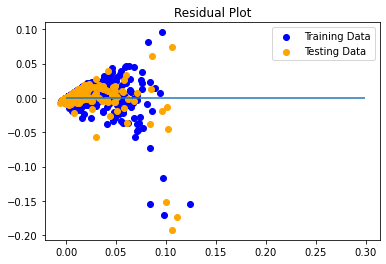

In [10]:
# Plot the residuals for the training and testing data.

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [11]:
# 2020 predicted dataset
summer_olympic_predicted_df = summer_olympic_df[summer_olympic_df['Year'] == 2020]
summer_olympic_predicted_df = summer_olympic_predicted_df.drop(['NOC', 'athlete_count_x', 'Gold', 'Silver', 'Bronze', 'country_medal_total', 'olympic_total', 'medal_share'], axis=1)
summer_olympic_predicted_df = summer_olympic_predicted_df[['Population', 'gdp_per_capita', 'Host', 'athlete_share']]
summer_olympic_predicted_df

,Population,gdp_per_capita,Host,athlete_share
2503,38928341,581.00,0,0.000435
2504,2837743,5287.00,0,0.000784
2505,43851043,3263.00,0,0.003832
2506,49710,12844.90,0,0.000523
2507,77265,30476.80,0,0.000174
...,...,...,...,...
2703,97338583,3499.00,0,0.001568
2704,106290,37233.00,0,0.000348
2705,29825968,620.00,0,0.000435
2706,18383956,981.00,0,0.002264


In [12]:
# Predictions
summer_predictions = model.predict(summer_olympic_predicted_df)
summer_predictions_df = pd.DataFrame(summer_predictions, summer_olympic_predicted_df.index)
summer_predictions_df.columns =['medal_share_predicted']
summer_predictions_df

,medal_share_predicted
2503,-0.002376
2504,-0.002612
2505,0.002259
2506,-0.003230
2507,-0.004210
...,...
2703,0.000018
2704,-0.004165
2705,-0.002522
2706,-0.000221


In [13]:
# Merge dataframes
summer_predicted_df = summer_olympic_predicted_df.merge(summer_predictions_df, left_index=True, right_index=True )
summer_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted
2503,38928341,581.00,0,0.000435,-0.002376
2504,2837743,5287.00,0,0.000784,-0.002612
2505,43851043,3263.00,0,0.003832,0.002259
2506,49710,12844.90,0,0.000523,-0.003230
2507,77265,30476.80,0,0.000174,-0.004210
...,...,...,...,...,...
2703,97338583,3499.00,0,0.001568,0.000018
2704,106290,37233.00,0,0.000348,-0.004165
2705,29825968,620.00,0,0.000435,-0.002522
2706,18383956,981.00,0,0.002264,-0.000221


In [14]:
# Setting minimum medals at 0
summer_predicted_df['positive_medal_share'] = np.where(summer_predicted_df['medal_share_predicted'] < 0, 0, summer_predicted_df['medal_share_predicted'])
summer_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share
2503,38928341,581.00,0,0.000435,-0.002376,0.000000
2504,2837743,5287.00,0,0.000784,-0.002612,0.000000
2505,43851043,3263.00,0,0.003832,0.002259,0.002259
2506,49710,12844.90,0,0.000523,-0.003230,0.000000
2507,77265,30476.80,0,0.000174,-0.004210,0.000000
...,...,...,...,...,...,...
2703,97338583,3499.00,0,0.001568,0.000018,0.000018
2704,106290,37233.00,0,0.000348,-0.004165,0.000000
2705,29825968,620.00,0,0.000435,-0.002522,0.000000
2706,18383956,981.00,0,0.002264,-0.000221,0.000000


In [15]:
# Determine predicted medal counts with 1080 total medals from 2020 summer olympics
summer_predicted_df['predicted_medals'] = summer_predicted_df['positive_medal_share'] * 1080
summer_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals
2503,38928341,581.00,0,0.000435,-0.002376,0.000000,0.000000
2504,2837743,5287.00,0,0.000784,-0.002612,0.000000,0.000000
2505,43851043,3263.00,0,0.003832,0.002259,0.002259,2.439293
2506,49710,12844.90,0,0.000523,-0.003230,0.000000,0.000000
2507,77265,30476.80,0,0.000174,-0.004210,0.000000,0.000000
...,...,...,...,...,...,...,...
2703,97338583,3499.00,0,0.001568,0.000018,0.000018,0.019797
2704,106290,37233.00,0,0.000348,-0.004165,0.000000,0.000000
2705,29825968,620.00,0,0.000435,-0.002522,0.000000,0.000000
2706,18383956,981.00,0,0.002264,-0.000221,0.000000,0.000000


In [16]:
# Add in NOCs
predicted_NOC_df = summer_olympic_df[summer_olympic_df['Year'] == 2020]
predicted_NOC_df = predicted_NOC_df[['NOC']]
predicted_NOC_df

,NOC
2503,AFG
2504,ALB
2505,ALG
2506,ASA
2507,AND
...,...
2703,VIE
2704,ISV
2705,YEM
2706,ZAM


In [17]:
# Merge final NOC to summer predicted
summer_predicted_df = summer_predicted_df.merge(predicted_NOC_df, left_index=True, right_index=True )
summer_predicted_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals,NOC
2503,38928341,581.00,0,0.000435,-0.002376,0.000000,0.000000,AFG
2504,2837743,5287.00,0,0.000784,-0.002612,0.000000,0.000000,ALB
2505,43851043,3263.00,0,0.003832,0.002259,0.002259,2.439293,ALG
2506,49710,12844.90,0,0.000523,-0.003230,0.000000,0.000000,ASA
2507,77265,30476.80,0,0.000174,-0.004210,0.000000,0.000000,AND
...,...,...,...,...,...,...,...,...
2703,97338583,3499.00,0,0.001568,0.000018,0.000018,0.019797,VIE
2704,106290,37233.00,0,0.000348,-0.004165,0.000000,0.000000,ISV
2705,29825968,620.00,0,0.000435,-0.002522,0.000000,0.000000,YEM
2706,18383956,981.00,0,0.002264,-0.000221,0.000000,0.000000,ZAM


In [21]:
# create summer final dataframe

summer2020_ML_final_df = summer_predicted_df.merge(summer_olympic_actual_df, left_index=True, right_index=True)

In [22]:
summer2020_ML_final_df['Difference_Acutal_Predicted'] = summer2020_ML_final_df['country_medal_total'] - summer2020_ML_final_df['predicted_medals']
summer2020_ML_final_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals,NOC,country_medal_total,Difference_Acutal_Predicted
2503,38928341,581.00,0,0.000435,-0.002376,0.000000,0.000000,AFG,0,0.000000
2504,2837743,5287.00,0,0.000784,-0.002612,0.000000,0.000000,ALB,0,0.000000
2505,43851043,3263.00,0,0.003832,0.002259,0.002259,2.439293,ALG,0,-2.439293
2506,49710,12844.90,0,0.000523,-0.003230,0.000000,0.000000,ASA,0,0.000000
2507,77265,30476.80,0,0.000174,-0.004210,0.000000,0.000000,AND,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
2703,97338583,3499.00,0,0.001568,0.000018,0.000018,0.019797,VIE,0,-0.019797
2704,106290,37233.00,0,0.000348,-0.004165,0.000000,0.000000,ISV,0,0.000000
2705,29825968,620.00,0,0.000435,-0.002522,0.000000,0.000000,YEM,0,0.000000
2706,18383956,981.00,0,0.002264,-0.000221,0.000000,0.000000,ZAM,0,0.000000


In [24]:
#adding season and year columns back for viz
summer2020_ML_final_df['Year'] = '2020'
summer2020_ML_final_df['Season'] = 'summer'
summer2020_ML_final_df

,Population,gdp_per_capita,Host,athlete_share,medal_share_predicted,positive_medal_share,predicted_medals,NOC,country_medal_total,Difference_Acutal_Predicted,Year,Season
2503,38928341,581.00,0,0.000435,-0.002376,0.000000,0.000000,AFG,0,0.000000,2020,summer
2504,2837743,5287.00,0,0.000784,-0.002612,0.000000,0.000000,ALB,0,0.000000,2020,summer
2505,43851043,3263.00,0,0.003832,0.002259,0.002259,2.439293,ALG,0,-2.439293,2020,summer
2506,49710,12844.90,0,0.000523,-0.003230,0.000000,0.000000,ASA,0,0.000000,2020,summer
2507,77265,30476.80,0,0.000174,-0.004210,0.000000,0.000000,AND,0,0.000000,2020,summer
...,...,...,...,...,...,...,...,...,...,...,...,...
2703,97338583,3499.00,0,0.001568,0.000018,0.000018,0.019797,VIE,0,-0.019797,2020,summer
2704,106290,37233.00,0,0.000348,-0.004165,0.000000,0.000000,ISV,0,0.000000,2020,summer
2705,29825968,620.00,0,0.000435,-0.002522,0.000000,0.000000,YEM,0,0.000000,2020,summer
2706,18383956,981.00,0,0.002264,-0.000221,0.000000,0.000000,ZAM,0,0.000000,2020,summer


In [25]:
#summer2020_ML_final_df = summer2020_ML_final_df[['Year', 'Season', 'Country','NOC','Population', 'gdp_per_capita', 'athlete_share', 'Host', 'country_medal_total', 'medal_share_predicted', 'positive_medal_share','predicted_medals', 'Difference_Acutal_Predicted', 'Latitude', 'Longitude'  ]]
summer2020_ML_final_df.to_csv('../Resources/summer2020_ML_final.csv', index=False)